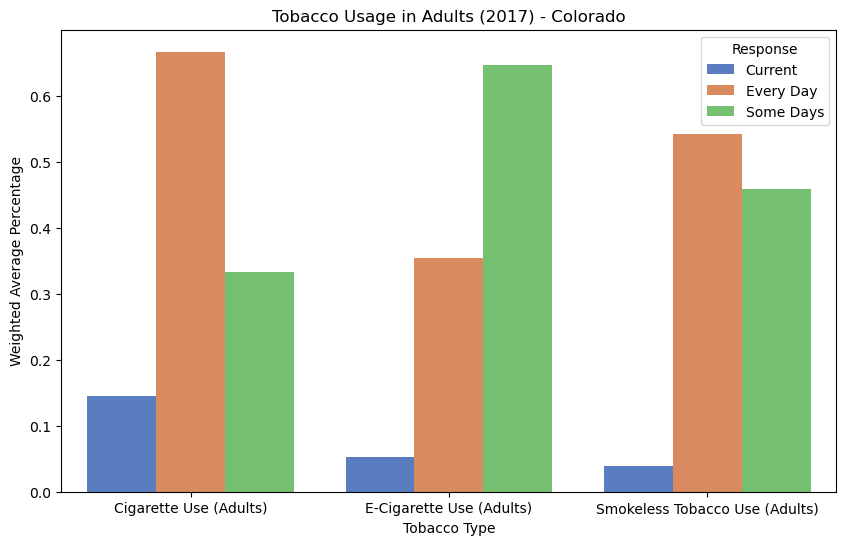

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import os
#compare tobacco types
# compare everyday vs some days
# Step 1: Download and Load the Filtered Data (Colorado 2017)
df = pd.read_csv("Resources/Behavioral_Risk_Factor_Data__Tobacco_Use__2017-Colorado.csv")

# Drop rows with no values in 'Sample_Size'
smokers_df = df.dropna(subset=['Sample_Size'])

# Create a new column 'Users' by multiplying 'Sample_Size' by 'Data_Value'
smokers_df = smokers_df.copy()
smokers_df['Users'] = smokers_df['Sample_Size'] * (smokers_df['Data_Value'] / 100)

# Step 2: Aggregate Data
# Group the data by the type of tobacco (smoking, smokeless, e-cigarette)
grouped_data = smokers_df.groupby(['TopicDesc', 'Response'])

# Aggregate the data by summing the weighted averages based on sample size
aggregated_data = grouped_data.apply(lambda x: (x['Sample_Size'] * (x['Data_Value'] / 100)).sum() / x['Sample_Size'].sum()).reset_index(name='weighted_average')

# Step 3: Visualize the Data
plt.figure(figsize=(10, 6))

# Bar plot for different forms of tobacco
sns.barplot(x='TopicDesc', y='weighted_average', hue='Response', data=aggregated_data, palette='muted')

plt.title('Tobacco Usage in Adults (2017) - Colorado')
plt.xlabel('Tobacco Type')
plt.ylabel('Weighted Average Percentage')
plt.show()
# Define the path for saving the file
output_folder = 'Colorado_output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save the plot as a PNG file in the specified folder
plt.savefig(os.path.join(output_folder, 'tobacco_types_usage.png'))

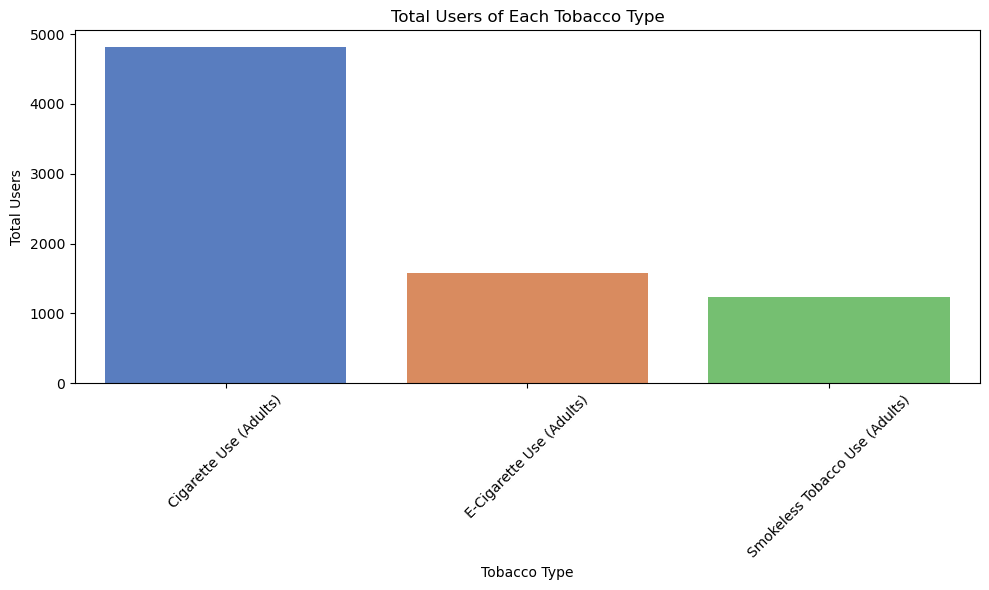

<Figure size 640x480 with 0 Axes>

In [2]:
# Grouping by 'TopicDesc' and calculating the total number of users
total_users_per_topic = smokers_df.groupby('TopicDesc')['Users'].sum().reset_index()

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TopicDesc', y='Users', data=total_users_per_topic, palette='muted')
plt.title('Total Users of Each Tobacco Type')
plt.xlabel('Tobacco Type')
plt.ylabel('Total Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
# Define the path for saving the file
output_folder = 'Colorado_output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save the plot as a PNG file in the specified folder
plt.savefig(os.path.join(output_folder, 'total_users_tobacco_types.png'))

In [6]:
# Assuming smokers_df is your DataFrame with 'Data_Value' and 'Sample_Size' columns

# Calculate Weighted Average
weighted_average = (smokers_df['Data_Value'] * smokers_df['Sample_Size']).sum() / smokers_df['Sample_Size'].sum()

# Calculate Median for the Data_Value column
median_data_value = smokers_df['Data_Value'].median()

# Calculate Range for Data_Value column
range_data_value = smokers_df['Data_Value'].max() - smokers_df['Data_Value'].min()

# Display the calculated statistics
print(f"Weighted Average: {weighted_average}")
print(f"Median for Data_Value: {median_data_value}")
print(f"Range for Data_Value: {range_data_value}")

Weighted Average: 12.64274250922387
Median for Data_Value: 34.7
Range for Data_Value: 68.1
